# Olympics-analysis

## Import libraries


In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Reading Datasets

### athletes_data

In [4]:
athletes_data = pd.read_csv('2025_Problem_C_Data\summerOly_athletes.csv')


athletes_data 


,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [5]:
athletes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    252565 non-null  object
 1   Sex     252565 non-null  object
 2   Team    252565 non-null  object
 3   NOC     252565 non-null  object
 4   Year    252565 non-null  int64 
 5   City    252565 non-null  object
 6   Sport   252565 non-null  object
 7   Event   252565 non-null  object
 8   Medal   252565 non-null  object
dtypes: int64(1), object(8)
memory usage: 17.3+ MB


In [6]:
athletes_data['Team'].value_counts()

Team
United States    16236
Great Britain    11390
France           11360
Italy             9185
Germany           8622
                 ...  
Formosa              1
Danzig               1
Salinero             1
Brynhild-2           1
Elvis Va             1
Name: count, Length: 1193, dtype: int64

In [7]:
athletes_data['Medal'].value_counts()

Medal
No medal    213747
Bronze       13070
Gold         13002
Silver       12746
Name: count, dtype: int64

### host_data

In [8]:
host_data = pd.read_csv('2025_Problem_C_Data\summerOly_hosts.csv')

host_data

,Year,Host
0,1896,"Athens, Greece"
1,1900,"Paris, France"
2,1904,"St. Louis, United States"
3,1908,"London, United Kingdom"
4,1912,"Stockholm, Sweden"
5,1916,Cancelled (WWI – Berlin had been awarded)
6,1920,"Antwerp, Belgium"
7,1924,"Paris, France"
8,1928,"Amsterdam, Netherlands"
9,1932,"Los Angeles, United States"


### medal_data

In [9]:
medal_data = pd.read_csv('2025_Problem_C_Data\summerOly_medal_counts.csv')

medal_data


,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896
...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024
1431,84,Refugee Olympic Team,0,0,1,1,2024
1432,84,Singapore,0,0,1,1,2024
1433,84,Slovakia,0,0,1,1,2024


In [10]:
medal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    1435 non-null   int64 
 1   NOC     1435 non-null   object
 2   Gold    1435 non-null   int64 
 3   Silver  1435 non-null   int64 
 4   Bronze  1435 non-null   int64 
 5   Total   1435 non-null   int64 
 6   Year    1435 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 78.6+ KB


### programs_data

In [11]:
programs_data= pd.read_csv('2025_Problem_C_Data\summerOly_programs.csv', encoding='latin1')

programs_data


,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


## Exploratory Data Analysis

### atheletes.csv data explore


In [12]:
athletes_data

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [13]:
print(athletes_data["Medal"].unique())

print(athletes_data["Sport"].unique())

print(athletes_data["Team"].unique())


['No medal' 'Gold' 'Bronze' 'Silver']
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics' 'Cycling Road'
 'Artistic Gymnastics' 'Karate' 'Baseball/Softball'
 'Trampoline Gymnastics' 'Marathon Swimming' 'Canoe Slalom' 'Surfing'
 'Canoe Sprint' 'Cycling BMX Racing' 'Equestrian' 'Artistic Swimming'
 'Cycling Track' 'Skateboarding' 'Cycling Mountain Bike' '3x3 Basketball'
 'Cycling BMX Freestyle

In [14]:
# 性别分析

gender_unique_values = athletes_data.Sex.value_counts()
gender_unique_values

Sex
M    178544
F     74021
Name: count, dtype: int64

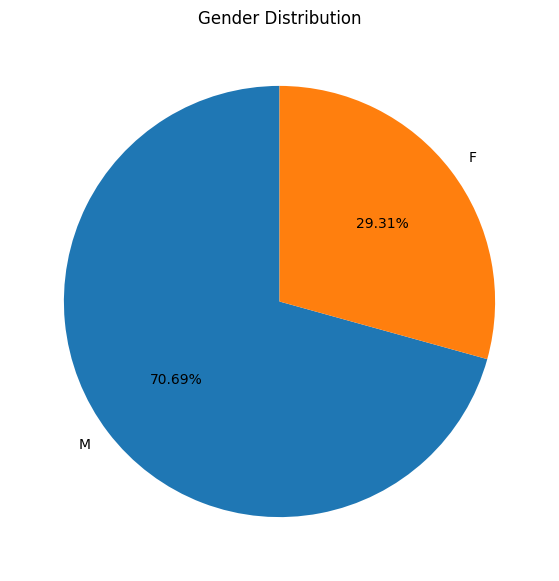

In [15]:
plt.figure(figsize=(15,7))
plt.title("Gender Distribution")
plt.pie(gender_unique_values, labels=gender_unique_values.index, autopct="%.2f%%", startangle=90)
plt.show()

In [16]:
# 国家参加人数分析
participants_counts  = athletes_data['NOC'].value_counts()

participants_counts

NOC
USA    16774
GBR    11998
FRA    11972
ITA     9351
GER     8866
       ...  
CRT       11
YMD        5
NBO        2
UNK        2
NFL        1
Name: count, Length: 234, dtype: int64

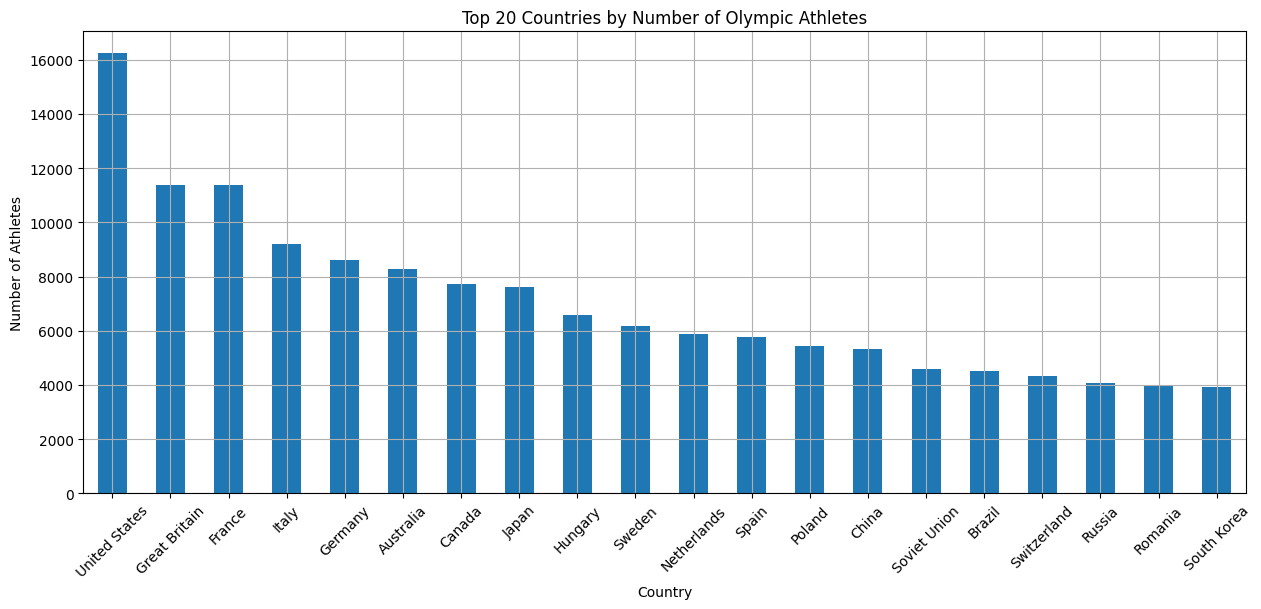

In [17]:
#国家历史参赛人数排名
plt.figure(figsize=(15, 6))
athletes_data['Team'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Countries by Number of Olympic Athletes')
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

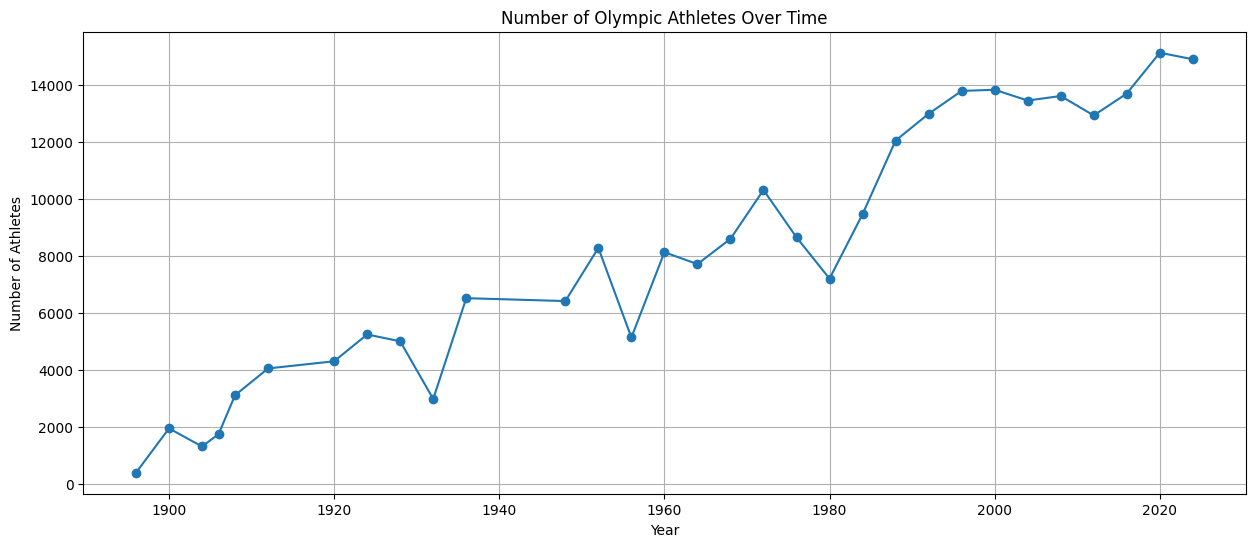

In [18]:
#国家历年参赛人数排名
yearly_counts = athletes_data['Year'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('Number of Olympic Athletes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()

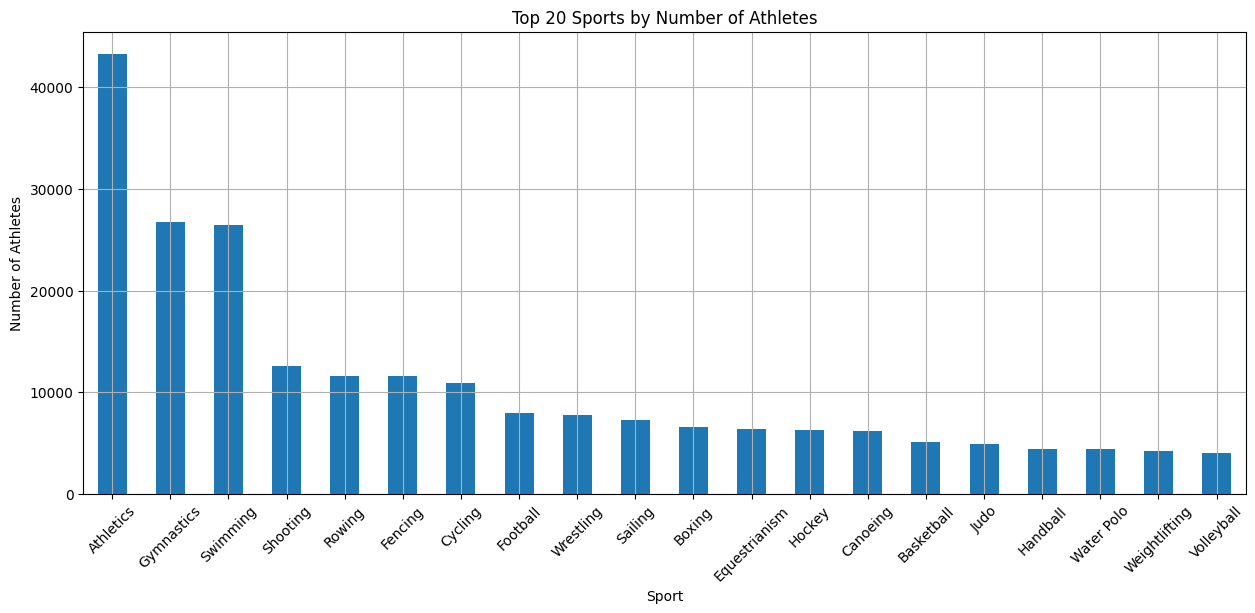

In [19]:
#项目参与人数排名
plt.figure(figsize=(15, 6))
athletes_data['Sport'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Sports by Number of Athletes')
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

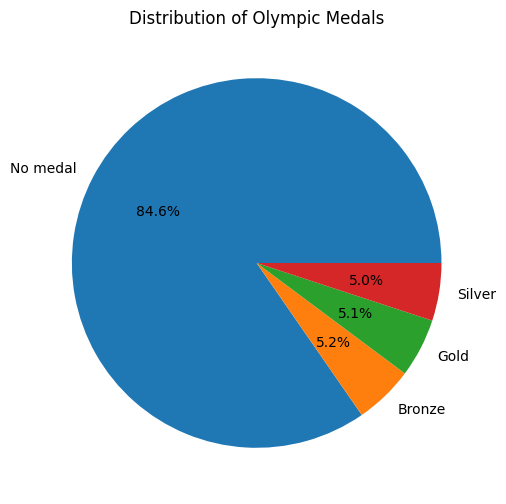

In [20]:
#获奖情况分析
plt.figure(figsize=(10, 6))
medal_dist = athletes_data['Medal'].value_counts()
plt.pie(medal_dist, labels=medal_dist.index, autopct='%1.1f%%')
plt.title('Distribution of Olympic Medals')
plt.show()

### medal_data data explore 

In [21]:
medal_data.head()

,Rank,NOC,Gold,Silver,Bronze,Total,Year
0,1,United States,11,7,2,20,1896
1,2,Greece,10,18,19,47,1896
2,3,Germany,6,5,2,13,1896
3,4,France,5,4,2,11,1896
4,5,Great Britain,2,3,2,7,1896


In [22]:
#添加奖牌和金牌百分比特征
# 1.计算每一年的金牌和奖牌总数
yearly_medals = medal_data.groupby('Year').agg({
    'Gold': 'sum',
    'Total': 'sum'
}).reset_index()

# 2. 将这些总数合并回原始数据框
medal_data = medal_data.merge(yearly_medals, on='Year', suffixes=('', '_total'))

# 3. 计算占比并添加新列
medal_data['Gold_Percentage'] = (medal_data['Gold'] / medal_data['Gold_total'] * 100).round(2)
medal_data['Total_Percentage'] = (medal_data['Total'] / medal_data['Total_total'] * 100).round(2)

# 4. 重命名列以避免混淆
medal_data = medal_data.rename(columns={
    'Gold_total': 'Year_Gold_Total',
    'Total_total': 'Year_Total_Medals'
})


In [23]:
#添加主办国特征


# 清理host数据
# 移除取消的奥运会
host_data = host_data[~host_data['Host'].str.contains('Cancelled', na=False)]

# 从Host列中提取国家名称
host_data['Host_Country'] = host_data['Host'].str.extract(r',\s*([^(]+)')
host_data['Host_Country'] = host_data['Host_Country'].str.strip()

# 处理一些特殊情况
host_data['Host_Country'] = host_data['Host_Country'].replace({
    'United Kingdom': 'Great Britain',
    'Soviet Union': 'Soviet Union',
    'West Germany': 'Germany'
})

# 2. 创建is_host列
medal_data['is_host'] = 0

# 3. 对每个主办年份和国家进行匹配
for _, host_row in host_data.iterrows():
    year = host_row['Year']
    country = host_row['Host_Country']
    # 设置对应的主办国标记为1
    mask = (medal_data['Year'] == year) & (medal_data['NOC'] == country)
    medal_data.loc[mask, 'is_host'] = 1



C:\Users\14479\AppData\Local\Temp\ipykernel_4136\260829327.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_data['Host_Country'] = host_data['Host'].str.extract(r',\s*([^(]+)')
C:\Users\14479\AppData\Local\Temp\ipykernel_4136\260829327.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_data['Host_Country'] = host_data['Host_Country'].str.strip()
C:\Users\14479\AppData\Local\Temp\ipykernel_4136\260829327.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [24]:
medal_data

,Rank,NOC,Gold,Silver,Bronze,Total,Year,Year_Gold_Total,Year_Total_Medals,Gold_Percentage,Total_Percentage,is_host
0,1,United States,11,7,2,20,1896,43,122,25.58,16.39,0
1,2,Greece,10,18,19,47,1896,43,122,23.26,38.52,1
2,3,Germany,6,5,2,13,1896,43,122,13.95,10.66,0
3,4,France,5,4,2,11,1896,43,122,11.63,9.02,0
4,5,Great Britain,2,3,2,7,1896,43,122,4.65,5.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,84,Qatar,0,0,1,1,2024,328,1039,0.00,0.10,0
1431,84,Refugee Olympic Team,0,0,1,1,2024,328,1039,0.00,0.10,0
1432,84,Singapore,0,0,1,1,2024,328,1039,0.00,0.10,0
1433,84,Slovakia,0,0,1,1,2024,328,1039,0.00,0.10,0


C:\Users\14479\AppData\Local\Temp\ipykernel_4136\3606228553.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


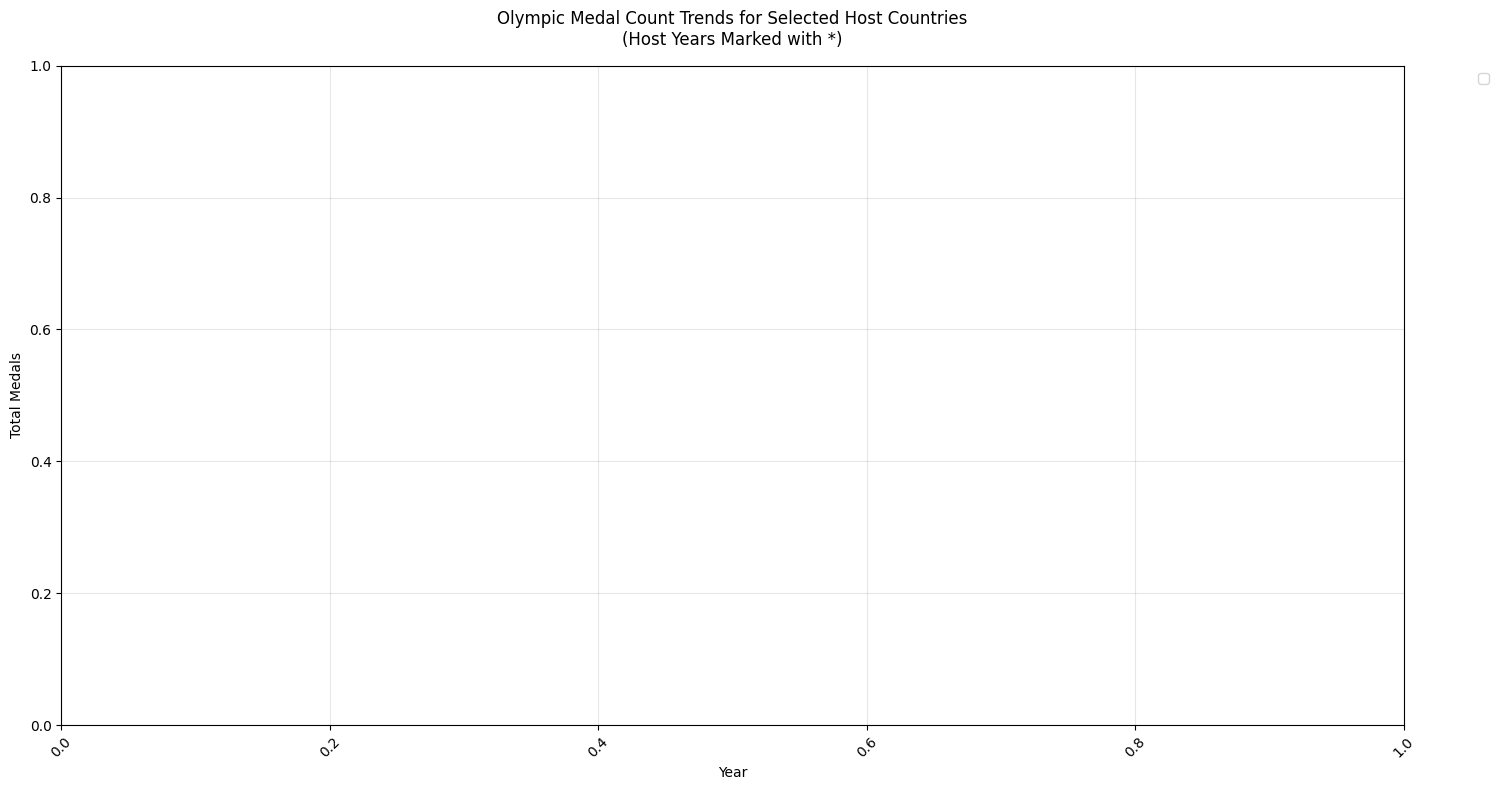

In [25]:
# 选择要分析的国家
selected_countries = []

# 创建图表
plt.figure(figsize=(15, 8))

# 为每个国家绘制折线
for country in selected_countries:
    # 获取该国家的数据
    country_data = medal_data[medal_data['NOC'] == country]
    
    # 绘制总奖牌数的变化
    plt.plot(country_data['Year'], country_data['Total_Percentage'], 
            label=country, marker='o', linestyle='-', alpha=0.7)
    
    # 特别标注主办年份的点
    host_years = country_data[country_data['is_host'] == 1]
    if not host_years.empty:
        plt.scatter(host_years['Year'], host_years['Total_Percentage'], 
                   s=150, marker='*', color='red',
                   label=f'{country} (Host Years)')

# 设置图表属性
plt.title('Olympic Medal Count Trends for Selected Host Countries\n(Host Years Marked with *)', 
         fontsize=12, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Total Medals', fontsize=10)
plt.grid(True, alpha=0.3)

# 添加图例
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 旋转x轴标签
plt.xticks(rotation=45)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

### programs_data data explore

In [26]:
programs_data

,Sport,Discipline,Code,Sports Governing Body,1896,1900,1904,1906*,1908,1912,...,1988,1992,1996,2000,2004,2008,2012,2016,2020,2024
0,Aquatics,Artistic Swimming,SWA,World Aquatics,0,0,0,0,0,0,...,2,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1,Aquatics,Diving,DIV,World Aquatics,0,0,2,1,2,4,...,4,4,4.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,Aquatics,Marathon Swimming,OWS,World Aquatics,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0
3,Aquatics,Swimming,SWM,World Aquatics,4,7,9,4,6,9,...,31,31,32.0,32.0,32.0,32.0,32.0,32.0,35.0,35.0
4,Aquatics,Water Polo,WPO,World Aquatics,0,1,1,0,1,1,...,1,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Skating,Figure,FSK,ISU,0,0,0,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,Ice Hockey,Ice Hockey,IHO,IIHF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Total events,Total events,Total events,Total events,43,97,95,76,110,102,...,237,257,271.0,300.0,301.0,302.0,302.0,306.0,339.0,329.0
72,Total disciplines,Total disciplines,Total disciplines,Total disciplines,10,22,18,13,25,18,...,31,34,37.0,40.0,40.0,42.0,40.0,42.0,50.0,48.0


In [27]:
# 获取年份列
year_columns = [col for col in programs_data.columns if str(col).isdigit()]

#确保年份列为数值类型
for col in year_columns:
    programs_data[col] = pd.to_numeric(programs_data[col].replace('•', '0'), errors='coerce').fillna(0)

#  按Sport分组计算每年的项目数量
sport_evolution = programs_data.groupby('Sport')[year_columns].sum()

#  添加sum列
sport_evolution['sum'] = sport_evolution[year_columns].astype(float).sum(axis=1)




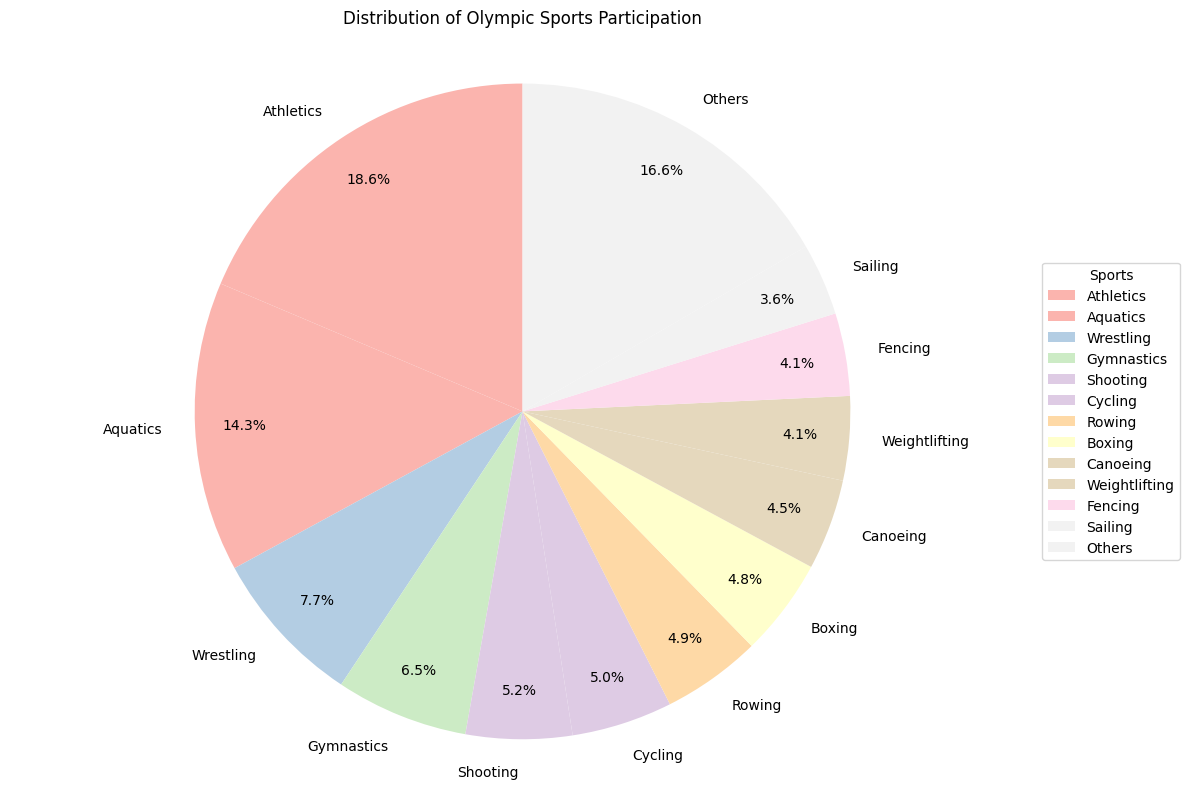


Detailed Statistics:
Number of major sports shown: 12
Number of sports in 'Others' category: 36

Sports in 'Others' category:
['Judo', 'Equestrian', 'Tennis', 'Archery', 'Taekwondo', 'Volleyball', 'Modern Pentathlon', 'Badminton', 'Table Tennis', 'Basketball', 'Field hockey', 'Football', 'Handball', 'Triathlon', 'Baseball\xa0and Softball', 'Golf', 'Rugby', 'Skateboarding', 'Karate', 'Skating', 'Sport Climbing', 'Tug of War', 'Polo', 'Surfing', 'Water Motorsports', 'Croquet', 'Breaking', 'Rackets', 'Lacrosse', 'Basque Pelota', 'Cricket', 'Ice Hockey', 'Jeu de Paume', 'Roque', 'Flag football', 'Squash']


In [28]:
# 删除汇总行
sport_evolution = sport_evolution[~sport_evolution.index.isin(['Total disciplines', 'Total events', 'Total sports'])]

# 按sum值排序
sorted_sports = sport_evolution.sort_values('sum', ascending=False)

# 设置阈值（这里以前25%的项目为例，你可以调整这个阈值）
threshold = sorted_sports['sum'].quantile(0.75)

# 分类
major_sports = sorted_sports[sorted_sports['sum'] >= threshold]
other_sports = sorted_sports[sorted_sports['sum'] < threshold]

# 准备饼图数据
sizes = list(major_sports['sum']) + [other_sports['sum'].sum()]
labels = list(major_sports.index) + ['Others']

# 创建饼图
plt.figure(figsize=(12, 8))
colors = plt.cm.Pastel1(np.linspace(0, 1, len(sizes)))  # 使用颜色映射生成颜色

plt.pie(sizes, 
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',  # 显示百分比
        pctdistance=0.85,   # 百分比标签的位置
        startangle=90)      # 起始角度

plt.title('Distribution of Olympic Sports Participation', pad=20)
plt.axis('equal')

# 添加图例
plt.legend(labels, 
          loc="center left", 
          bbox_to_anchor=(1, 0.5),
          title="Sports")

plt.tight_layout()
plt.show()

# 打印统计信息
print(f"\nDetailed Statistics:")
print(f"Number of major sports shown: {len(major_sports)}")
print(f"Number of sports in 'Others' category: {len(other_sports)}")
print("\nSports in 'Others' category:")
print(other_sports.index.tolist())

## Data Cleaning

### athletes_data

In [29]:
athletes_data

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze


In [30]:
# 检查缺失值

athletes_data.isnull().sum()

Name     0
Sex      0
Team     0
NOC      0
Year     0
City     0
Sport    0
Event    0
Medal    0
dtype: int64

In [31]:
# 检查 noc 和 team 是否是一一对应

athletes_data.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts()

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
      ... 
KOS      1
LES      1
ROC      1
LBN      1
AIN      1
Name: count, Length: 234, dtype: int64

我们这里发现 Noc 和 team 并不是一一对应的，这意味着一个Noc代码可能会对应多个队伍，对此我们决定建立国家和Noc之间的映射表

映射表数据来源 :(https://www.kaggle.com/code/chadalee/olympics-data-cleaning-exploration-prediction/input?select=noc_regions.csv)

In [32]:
# Lets read in the noc_country mapping first
noc_country = pd.read_csv('additional_data/noc_regions.csv')
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)

noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [33]:
# merging
athletes_data = athletes_data.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')


In [34]:
athletes_data

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal,Country
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal,China
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal,China
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal,Denmark
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal,Netherlands
...,...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Paris,Athletics,Women's 100m,No medal,Equatorial Guinea
252561,Emanuela Liuzzi,F,Italy,ITA,2024,Paris,Wrestling,Women's Freestyle 50kg,No medal,Italy
252562,Isayah Boers,M,Netherlands,NED,2024,Paris,Athletics,4 x 400m Relay Mixed,Gold,Netherlands
252563,Kevin Staut,M,France,FRA,2024,Paris,Equestrian,Jumping Team,Bronze,France


In [35]:
# Do we have NOCs that didnt have a matching country in the master?
athletes_data.loc[athletes_data['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
509,SGP,Singapore
5523,ROT,Refugee Olympic Athletes
37154,SGP,June Climene
51268,UNK,Unknown
54091,TUV,Tuvalu
67495,SGP,Rika II
89655,SGP,Singapore-2
193502,SGP,Singapore-1
222634,ROC,Russia
222809,EOR,Refugee Olympic Team


我们通过查看他们的team信息可以手动为他们添加国家信息

我们发现有一些的noc是存在标记错误的: 对应Russia的应该是RUS 对应Lebanon的应该是 LIB 对这些数据我们对他们的noc代码进行手动修改

同时存在一些特殊代码，如AIN 表示的是独立艺术家 如EOR表示的是难民奥林匹克队

In [36]:
athletes_data['Country'] = np.where(athletes_data['NOC']=='SGP', 'Singapore', athletes_data['Country'])
athletes_data['Country'] = np.where(athletes_data['NOC']=='ROT', 'Refugee Olympic Athletes', athletes_data['Country'])
athletes_data['Country'] = np.where(athletes_data['NOC']=='UNK', 'Unknown', athletes_data['Country'])
athletes_data['Country'] = np.where(athletes_data['NOC']=='TUV', 'Tuvalu', athletes_data['Country'])
athletes_data['Country'] = np.where(athletes_data['NOC']=='AIN', 'AIN', athletes_data['Country'])
athletes_data['Country'] = np.where(athletes_data['NOC']=='EOR', 'EOR', athletes_data['Country'])



In [37]:
athletes_data['NOC'] = athletes_data['NOC'].replace({
    'ROC': 'RUS',
    'LBN': 'LIB'
})


现在经过处理之后，已经完成了从noc到地区的映射

In [38]:
#删除关于冰雪的项目
# Remove ice sports and athletes playing ice sports
ice_sports = ['Figure Skating', 'Ice Hockey']
athletes_data = athletes_data[~athletes_data['Sport'].isin(ice_sports)]# 删除不属于夏季奥运会的项目

In [39]:
# 让 country 取代team ，删除team和city特征栏
athletes_data = athletes_data.drop(['Team', 'City'], axis=1)


In [40]:
#编码处理
#对sex编码
athletes_data['Sex'] = athletes_data['Sex'].map({'M': 1, 'F': 0})

#对奖牌编码
athletes_data['is_gold'] = (athletes_data['Medal'] == 'Gold').astype(int)
athletes_data['is_silver'] = (athletes_data['Medal'] == 'Silver').astype(int)
athletes_data['is_bronze'] = (athletes_data['Medal'] == 'Bronze').astype(int)

#  创建is_medal特征
athletes_data['is_medal'] = ((athletes_data['is_gold'] + 
                             athletes_data['is_silver'] + 
                             athletes_data['is_bronze']) > 0).astype(int)



In [41]:
#删除medal特征
athletes_data = athletes_data.drop(['Medal'], axis=1)

In [42]:
athletes_data

,Name,Sex,NOC,Year,Sport,Event,Country,is_gold,is_silver,is_bronze,is_medal
0,A Dijiang,1,CHN,1992,Basketball,Basketball Men's Basketball,China,0,0,0,0
1,A Lamusi,1,CHN,2012,Judo,Judo Men's Extra-Lightweight,China,0,0,0,0
2,Gunnar Aaby,1,DEN,1920,Football,Football Men's Football,Denmark,0,0,0,0
3,Edgar Aabye,1,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Denmark,1,0,0,1
4,Cornelia (-strannood),0,NED,1932,Athletics,Athletics Women's 100 metres,Netherlands,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
252560,Sefora Ada,0,GEQ,2024,Athletics,Women's 100m,Equatorial Guinea,0,0,0,0
252561,Emanuela Liuzzi,0,ITA,2024,Wrestling,Women's Freestyle 50kg,Italy,0,0,0,0
252562,Isayah Boers,1,NED,2024,Athletics,4 x 400m Relay Mixed,Netherlands,1,0,0,1
252563,Kevin Staut,1,FRA,2024,Equestrian,Jumping Team,France,0,0,1,1


我们发现对于团队项目，团队中的每个运动员都会被记录获奖情况，所以简单的对is_medal进行求和这样求出的金牌总数会给我们一个错误的奖牌统计，所以我们得先找到哪些项目是团队项目：

加入一支队伍在一届奥运会上赢得了一个项目的多个金牌，那么这个项目就是团队项目

思路来源：(https://www.kaggle.com/code/chadalee/olympics-data-cleaning-exploration-prediction)

In [43]:
identify_team_events = pd.pivot_table(
    athletes_data,
    index=['Country', 'Year','Sport', 'Event'],
    values=['is_gold', 'is_silver', 'is_bronze'],
    aggfunc='sum',
    fill_value=0
).reset_index()

identify_team_events.columns = ['Country', 'Year', 'Sport', 'Event', 'Gold', 'Silver', 'Bronze']



In [44]:
team_events = identify_team_events[identify_team_events['Gold'] > 1].copy()

team_events = team_events['Event'].unique()

len(team_events)

306

In [45]:
# 添加一个特征用于表明是否是团队项目
identify_team_events['is_team'] = identify_team_events['Event'].isin(team_events).astype(int)

identify_team_events



,Country,Year,Sport,Event,Gold,Silver,Bronze,is_team
0,AIN,2024,Canoe Sprint,Men's Canoe Double 500m,0,0,0,1
1,AIN,2024,Canoe Sprint,Men's Canoe Single 1000m,0,0,0,0
2,AIN,2024,Canoe Sprint,Men's Kayak Single 1000m,0,0,0,0
3,AIN,2024,Canoe Sprint,Women's Canoe Single 200m,0,0,0,0
4,AIN,2024,Cycling Road,Men's Individual Time Trial,0,0,0,0
...,...,...,...,...,...,...,...,...
111275,Zimbabwe,2024,Athletics,Men's Marathon,0,0,0,0
111276,Zimbabwe,2024,Athletics,Women's Marathon,0,0,0,0
111277,Zimbabwe,2024,Rowing,Men's Single Sculls,0,0,0,0
111278,Zimbabwe,2024,Swimming,Men's 200m Backstroke,0,0,0,0


In [46]:
# 建立一个总奖牌数特征

identify_team_events['Total_medal'] = identify_team_events['Gold'] + identify_team_events['Silver'] + identify_team_events['Bronze'] 

经过检查，我们发现有一些项目不属于团队项目但是仍然出现了一个项目的金牌被多个人获得的情况：
经调查，我们发现这是因为有并列金牌的现象出现，我们对这些情况进行筛查和处理

In [47]:
remove_events = ["Swimming Women's 100 metres Freestyle"]

team_events= list(set(team_events) - set(remove_events))

len(team_events)

305

In [48]:
identify_team_events

,Country,Year,Sport,Event,Gold,Silver,Bronze,is_team,Total_medal
0,AIN,2024,Canoe Sprint,Men's Canoe Double 500m,0,0,0,1,0
1,AIN,2024,Canoe Sprint,Men's Canoe Single 1000m,0,0,0,0,0
2,AIN,2024,Canoe Sprint,Men's Kayak Single 1000m,0,0,0,0,0
3,AIN,2024,Canoe Sprint,Women's Canoe Single 200m,0,0,0,0,0
4,AIN,2024,Cycling Road,Men's Individual Time Trial,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
111275,Zimbabwe,2024,Athletics,Men's Marathon,0,0,0,0,0
111276,Zimbabwe,2024,Athletics,Women's Marathon,0,0,0,0,0
111277,Zimbabwe,2024,Rowing,Men's Single Sculls,0,0,0,0,0
111278,Zimbabwe,2024,Swimming,Men's 200m Backstroke,0,0,0,0,0


## Feature enginering

### 有关运动员实力的特征构建

我们希望以上面的作为基准处理总结的信息

首先想要向上面添加每个项目在该年份参赛的运动员实力特征 ： 构建特征的方向往下面这几个方向去构建

运动员规模，性别比例，运动项目分布情况，奖牌效率（每名运动员平均获得的奖牌数），当前项目明星运动员数量

In [49]:
# 从athletes_data中获取数据并实现对每个项目运动员数量的统计

athlete_counts = athletes_data.groupby(['Country', 'Year', 'Sport', 'Event']).size().reset_index(name='athlete_count')

# 2. 将运动员数量信息合并到identify_team_events
identify_team_events = pd.merge(
    identify_team_events,
    athlete_counts,
    on=['Country', 'Year', 'Sport', 'Event'],
    how='left'
)



In [50]:
# 分别统计他们的男女运动员人数

# 1. 分别计算男女运动员数量
gender_counts = athletes_data.groupby(['Country', 'Year', 'Sport', 'Event', 'Sex']).size().unstack(fill_value=0)
gender_counts.columns = ['female_count', 'male_count']  # 因为Sex已经编码为0(F)和1(M)
gender_counts = gender_counts.reset_index()

# 2. 将性别统计信息合并到event_summary
identify_team_events  = pd.merge(
    identify_team_events ,
    gender_counts,
    on=['Country', 'Year', 'Sport', 'Event'],
    how='left'
)

In [51]:
identify_team_events

,Country,Year,Sport,Event,Gold,Silver,Bronze,is_team,Total_medal,athlete_count,female_count,male_count
0,AIN,2024,Canoe Sprint,Men's Canoe Double 500m,0,0,0,1,0,2,0,2
1,AIN,2024,Canoe Sprint,Men's Canoe Single 1000m,0,0,0,0,0,1,0,1
2,AIN,2024,Canoe Sprint,Men's Kayak Single 1000m,0,0,0,0,0,1,0,1
3,AIN,2024,Canoe Sprint,Women's Canoe Single 200m,0,0,0,0,0,2,2,0
4,AIN,2024,Cycling Road,Men's Individual Time Trial,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
111275,Zimbabwe,2024,Athletics,Men's Marathon,0,0,0,0,0,1,0,1
111276,Zimbabwe,2024,Athletics,Women's Marathon,0,0,0,0,0,1,1,0
111277,Zimbabwe,2024,Rowing,Men's Single Sculls,0,0,0,0,0,1,0,1
111278,Zimbabwe,2024,Swimming,Men's 200m Backstroke,0,0,0,0,0,1,0,1


In [52]:
identify_team_events.to_csv('identify_team_events.csv', index=False)

In [53]:
# 对上面数据按照Country(NOC)、Year、Sport 进行聚合

country_year_sport_summary = identify_team_events.groupby(['Country', 'Year', 'Sport']).agg({
    'Gold': 'sum',
    'Silver': 'sum',
    'Bronze': 'sum',
    'Total_medal': 'sum',
    'is_team': 'sum',  # 求出团队项目的个数
    'athlete_count': 'sum',
    'female_count': 'sum',
    'male_count': 'sum',
}).reset_index()


country_year_sport_summary =  country_year_sport_summary.rename(columns={'is_team': 'team_events_count'})



country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,team_events_count,athlete_count,female_count,male_count
0,AIN,2024,Canoe Sprint,0,0,0,0,1,6,2,4
1,AIN,2024,Cycling Road,0,0,0,0,0,7,5,2
2,AIN,2024,Rowing,0,0,1,1,0,2,1,1
3,AIN,2024,Shooting,0,0,0,0,0,2,2,0
4,AIN,2024,Swimming,0,0,0,0,0,7,4,3
...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,0,1,0,1
25954,Zimbabwe,2020,Swimming,0,0,0,0,0,2,1,1
25955,Zimbabwe,2024,Athletics,0,0,0,0,0,4,1,3
25956,Zimbabwe,2024,Rowing,0,0,0,0,0,1,0,1


In [54]:
sport_gender_counts = country_year_sport_summary.groupby(['Year', 'Sport'])[['male_count', 'female_count']].sum().reset_index()

sport_gender_counts

,Year,Sport,male_count,female_count
0,1896,Athletics,106,0
1,1896,Cycling,41,0
2,1896,Fencing,15,0
3,1896,Gymnastics,97,0
4,1896,Shooting,65,0
...,...,...,...,...
760,2024,Triathlon,57,54
761,2024,Volleyball,156,155
762,2024,Water Polo,156,130
763,2024,Weightlifting,61,61


In [55]:
# 将性别统计信息合并回country_year_sport_summary
country_year_sport_summary = pd.merge(
    country_year_sport_summary,
    sport_gender_counts.rename(columns={
        'female_count': 'total_female_ participants',
        'male_count': 'total_male_participants',
    }),
    on=['Year', 'Sport'],
    how='left'
)

In [56]:
country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,team_events_count,athlete_count,female_count,male_count,total_male_participants,total_female_ participants
0,AIN,2024,Canoe Sprint,0,0,0,0,1,6,2,4,164,180
1,AIN,2024,Cycling Road,0,0,0,0,0,7,5,2,119,115
2,AIN,2024,Rowing,0,0,1,1,0,2,1,1,252,252
3,AIN,2024,Shooting,0,0,0,0,0,2,2,0,275,279
4,AIN,2024,Swimming,0,0,0,0,0,7,4,3,830,755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,0,1,0,1,262,254
25954,Zimbabwe,2020,Swimming,0,0,0,0,0,2,1,1,823,722
25955,Zimbabwe,2024,Athletics,0,0,0,0,0,4,1,3,1184,1168
25956,Zimbabwe,2024,Rowing,0,0,0,0,0,1,0,1,252,252


In [57]:
# 添加total_participants特征
country_year_sport_summary['total_participants'] = (country_year_sport_summary['total_male_participants'] + 
                                                  country_year_sport_summary['total_female_ participants'])



In [58]:
country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,team_events_count,athlete_count,female_count,male_count,total_male_participants,total_female_ participants,total_participants
0,AIN,2024,Canoe Sprint,0,0,0,0,1,6,2,4,164,180,344
1,AIN,2024,Cycling Road,0,0,0,0,0,7,5,2,119,115,234
2,AIN,2024,Rowing,0,0,1,1,0,2,1,1,252,252,504
3,AIN,2024,Shooting,0,0,0,0,0,2,2,0,275,279,554
4,AIN,2024,Swimming,0,0,0,0,0,7,4,3,830,755,1585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,0,1,0,1,262,254,516
25954,Zimbabwe,2020,Swimming,0,0,0,0,0,2,1,1,823,722,1545
25955,Zimbabwe,2024,Athletics,0,0,0,0,0,4,1,3,1184,1168,2352
25956,Zimbabwe,2024,Rowing,0,0,0,0,0,1,0,1,252,252,504


添加特征： 1.奖牌效率（每名运动员平均获得的奖牌数） 2.性别比例 3. 男运动员规模占比 4. 女运动员规模占比


In [63]:
#奖牌效率
country_year_sport_summary['medal_ef'] = (country_year_sport_summary['Total_medal'] / 
                                            country_year_sport_summary['athlete_count']).fillna(0)

# 添加女生运动员在总的运动员中的占比
country_year_sport_summary['female_ratio'] = (country_year_sport_summary['female_count'] / 
                                            country_year_sport_summary['athlete_count']).fillna(0)

# 添加男运动员规模占比
country_year_sport_summary['male_proportion'] = (country_year_sport_summary['male_count'] / 
                                            country_year_sport_summary['total_male_participants']).fillna(0)

# 添加女运动员规模占比
country_year_sport_summary['female_proportion'] = (country_year_sport_summary['female_count'] / 
                                            country_year_sport_summary['total_female_ participants']).fillna(0)

# 添加总运动远动员占比
country_year_sport_summary['athlete_proportion'] = (country_year_sport_summary['athlete_count'] / 
                                            country_year_sport_summary['total_participants']).fillna(0)



添加特征：当前参加该sport类别的运动员占该国家总运动员个数比例（运动项目分布）

In [66]:
# 1. 计算每个国家在每年的总运动员数

country_year_total = country_year_sport_summary.groupby(['Country', 'Year']).agg({
    'athlete_count': 'sum'
}).reset_index().rename(columns={'athlete_count': 'country_total_athletes'})

# 2. 将总运动员数合并回原数据
country_year_sport_summary = pd.merge(
    country_year_sport_summary,
    country_year_total,
    on=['Country', 'Year'],
    how='left'
)


In [67]:
country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,team_events_count,athlete_count,female_count,male_count,total_male_participants,total_female_ participants,total_participants,medal_ef,female_ratio,male_proportion,female_proportion,athlete_proportion,country_total_athletes
0,AIN,2024,Canoe Sprint,0,0,0,0,1,6,2,4,164,180,344,0.0,0.333333,0.024390,0.011111,0.017442,46
1,AIN,2024,Cycling Road,0,0,0,0,0,7,5,2,119,115,234,0.0,0.714286,0.016807,0.043478,0.029915,46
2,AIN,2024,Rowing,0,0,1,1,0,2,1,1,252,252,504,0.5,0.500000,0.003968,0.003968,0.003968,46
3,AIN,2024,Shooting,0,0,0,0,0,2,2,0,275,279,554,0.0,1.000000,0.000000,0.007168,0.003610,46
4,AIN,2024,Swimming,0,0,0,0,0,7,4,3,830,755,1585,0.0,0.571429,0.003614,0.005298,0.004416,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,0,1,0,1,262,254,516,0.0,0.000000,0.003817,0.000000,0.001938,5
25954,Zimbabwe,2020,Swimming,0,0,0,0,0,2,1,1,823,722,1545,0.0,0.500000,0.001215,0.001385,0.001294,5
25955,Zimbabwe,2024,Athletics,0,0,0,0,0,4,1,3,1184,1168,2352,0.0,0.250000,0.002534,0.000856,0.001701,7
25956,Zimbabwe,2024,Rowing,0,0,0,0,0,1,0,1,252,252,504,0.0,0.000000,0.003968,0.000000,0.001984,7


In [68]:
# 添加总运动远动员占比
country_year_sport_summary['sport_distribution_ratio'] = (country_year_sport_summary['athlete_count'] / 
                                            country_year_sport_summary['country_total_athletes']).fillna(0)

country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,team_events_count,athlete_count,female_count,...,total_male_participants,total_female_ participants,total_participants,medal_ef,female_ratio,male_proportion,female_proportion,athlete_proportion,country_total_athletes,sport_distribution_ratio
0,AIN,2024,Canoe Sprint,0,0,0,0,1,6,2,...,164,180,344,0.0,0.333333,0.024390,0.011111,0.017442,46,0.130435
1,AIN,2024,Cycling Road,0,0,0,0,0,7,5,...,119,115,234,0.0,0.714286,0.016807,0.043478,0.029915,46,0.152174
2,AIN,2024,Rowing,0,0,1,1,0,2,1,...,252,252,504,0.5,0.500000,0.003968,0.003968,0.003968,46,0.043478
3,AIN,2024,Shooting,0,0,0,0,0,2,2,...,275,279,554,0.0,1.000000,0.000000,0.007168,0.003610,46,0.043478
4,AIN,2024,Swimming,0,0,0,0,0,7,4,...,830,755,1585,0.0,0.571429,0.003614,0.005298,0.004416,46,0.152174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,0,1,0,...,262,254,516,0.0,0.000000,0.003817,0.000000,0.001938,5,0.200000
25954,Zimbabwe,2020,Swimming,0,0,0,0,0,2,1,...,823,722,1545,0.0,0.500000,0.001215,0.001385,0.001294,5,0.400000
25955,Zimbabwe,2024,Athletics,0,0,0,0,0,4,1,...,1184,1168,2352,0.0,0.250000,0.002534,0.000856,0.001701,7,0.571429
25956,Zimbabwe,2024,Rowing,0,0,0,0,0,1,0,...,252,252,504,0.0,0.000000,0.003968,0.000000,0.001984,7,0.142857


添加特征：是否是主办国信息

In [71]:
host_data.head()

,Year,Host,Host_Country
0,1896,"Athens, Greece",Greece
1,1900,"Paris, France",France
2,1904,"St. Louis, United States",United States
3,1908,"London, United Kingdom",Great Britain
4,1912,"Stockholm, Sweden",Sweden


In [73]:
country_year_sport_summary['is_host'] = 0

#  对每个主办年份和国家进行匹配
for _, host_row in host_data.iterrows():
    year = host_row['Year']
    country = host_row['Host_Country']
    # 设置对应的主办国标记为1
    mask = (country_year_sport_summary['Year'] == year) & (country_year_sport_summary['Country'] == country)
    country_year_sport_summary.loc[mask, 'is_host'] = 1

In [74]:
country_year_sport_summary

,Country,Year,Sport,Gold,Silver,Bronze,Total_medal,team_events_count,athlete_count,female_count,...,total_female_ participants,total_participants,medal_ef,female_ratio,male_proportion,female_proportion,athlete_proportion,country_total_athletes,sport_distribution_ratio,is_host
0,AIN,2024,Canoe Sprint,0,0,0,0,1,6,2,...,180,344,0.0,0.333333,0.024390,0.011111,0.017442,46,0.130435,0
1,AIN,2024,Cycling Road,0,0,0,0,0,7,5,...,115,234,0.0,0.714286,0.016807,0.043478,0.029915,46,0.152174,0
2,AIN,2024,Rowing,0,0,1,1,0,2,1,...,252,504,0.5,0.500000,0.003968,0.003968,0.003968,46,0.043478,0
3,AIN,2024,Shooting,0,0,0,0,0,2,2,...,279,554,0.0,1.000000,0.000000,0.007168,0.003610,46,0.043478,0
4,AIN,2024,Swimming,0,0,0,0,0,7,4,...,755,1585,0.0,0.571429,0.003614,0.005298,0.004416,46,0.152174,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25953,Zimbabwe,2020,Rowing,0,0,0,0,0,1,0,...,254,516,0.0,0.000000,0.003817,0.000000,0.001938,5,0.200000,0
25954,Zimbabwe,2020,Swimming,0,0,0,0,0,2,1,...,722,1545,0.0,0.500000,0.001215,0.001385,0.001294,5,0.400000,0
25955,Zimbabwe,2024,Athletics,0,0,0,0,0,4,1,...,1168,2352,0.0,0.250000,0.002534,0.000856,0.001701,7,0.571429,0
25956,Zimbabwe,2024,Rowing,0,0,0,0,0,1,0,...,252,504,0.0,0.000000,0.003968,0.000000,0.001984,7,0.142857,0


In [61]:
len(list(set(athletes_data['Country'].unique()) - set(medal_data['NOC'].unique())))

78

我们发现上面这些在运动员数据中出现的国家，但是在medal_data出现的国家都是没有拿过奖牌的

In [62]:
# 2. 找出Total为0的国家
zero_medals = medal_data[medal_data['Total'] == 0]

# 3. 显示结果
print("从未获得过奖牌的国家数量：", len(zero_medals))

从未获得过奖牌的国家数量： 0
